# Read files

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the attention matrices
attention_matrices = np.load('runs/data/andrii0_wd0.0001_dr0.1_rTEMP/key_electrodes/model_epoch100/key_electrodes_btbank3_1_onset_attention.npy', allow_pickle=True)

In [2]:
x = np.array(attention_matrices.item()['analysis_results']).mean(axis=0)
x.shape

(5, 121, 121)

In [9]:
electrode_labels = attention_matrices.item()['electrode_labels']
electrode_labels

['CLS',
 'P2b14',
 'P2b6',
 'O1bId13',
 'F3aOF6',
 'T1b6',
 'P2a8',
 'F3aOF3',
 'O1bId14',
 'O1aIb13',
 'F2Ia5',
 'F2Ia13',
 'O1bId4',
 'P2a2',
 'O1aIb1',
 'F3aOF2',
 'F2Ia11',
 'F2Ia4',
 'F3d6',
 'O1aIb4',
 'F3c9',
 'O1bId3',
 'O1bId11',
 'F3c5',
 'O1aIb5',
 'P2a1',
 'T1cIe11',
 'P2b15',
 'O1bId2',
 'T1cIe8',
 'F2Ia9',
 'F3c10',
 'F2Ia1',
 'P2b8',
 'F3c4',
 'T1cIe12',
 'F2Ia7',
 'T1aIc1',
 'T1cIe9',
 'O1aIb2',
 'F3c6',
 'P2a3',
 'O1aIb7',
 'O1aIb11',
 'F3d10',
 'F3d8',
 'P2b16',
 'F3d2',
 'F3b8',
 'F3aOF4',
 'F2Ia6',
 'T1cIe6',
 'O1aIb14',
 'T1aIc2',
 'P2b10',
 'F3aOF7',
 'O1aIb16',
 'F3c8',
 'P2b3',
 'F2Ia3',
 'T1b3',
 'P2b13',
 'P2a10',
 'F3c3',
 'T1aIc3',
 'T1cIe10',
 'T1aIc6',
 'O1aIb9',
 'P2b9',
 'O1bId9',
 'P2a5',
 'F3c1',
 'F3c2',
 'F2Ia10',
 'F3d3',
 'O1bId15',
 'F3b1',
 'F2Ia8',
 'T1b2',
 'P2b5',
 'F2Ia12',
 'F3aOF5',
 'T1b5',
 'O1aIb6',
 'T1aIc4',
 'P2b12',
 'P2b11',
 'F3d7',
 'F3b2',
 'P2a4',
 'P2a9',
 'O1bId1',
 'O1aIb3',
 'O1bId5',
 'T1b4',
 'O1aIb8',
 'F3aOF1',
 'F3aOF8'

In [8]:
attention_matrices.item()

{'analysis_results': [array([[[0.16043817, 0.01010596, 0.00560573, ..., 0.00705962,
           0.00513703, 0.00650703],
          [0.09701551, 0.01210827, 0.00732403, ..., 0.00715356,
           0.00590639, 0.00737999],
          [0.09255097, 0.00775656, 0.01295316, ..., 0.00744951,
           0.00599117, 0.00671334],
          ...,
          [0.09459505, 0.00832134, 0.00724062, ..., 0.01230204,
           0.00617216, 0.0070549 ],
          [0.08917606, 0.00850586, 0.00766124, ..., 0.00753911,
           0.0117162 , 0.00710438],
          [0.10173361, 0.00855798, 0.00752117, ..., 0.00731982,
           0.00605462, 0.0097525 ]],
  
         [[0.00232766, 0.0091914 , 0.00820155, ..., 0.00921214,
           0.00816742, 0.0090815 ],
          [0.08042672, 0.02492572, 0.00713229, ..., 0.00774185,
           0.00744121, 0.00769886],
          [0.09055393, 0.00788161, 0.02524708, ..., 0.00753595,
           0.00658641, 0.00677045],
          ...,
          [0.08739395, 0.00815007, 0.00695544,

With CLS token

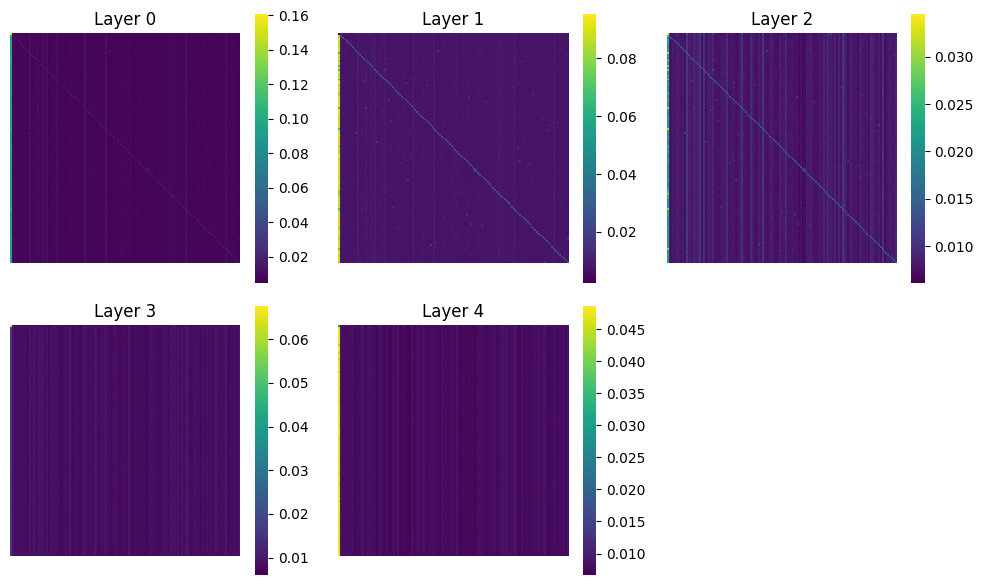

In [11]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.heatmap(x[i], cmap='viridis', annot=False, fmt='.3f', square=True, xticklabels=False, yticklabels=False)
    plt.title(f'Layer {i}')

plt.tight_layout()
plt.show()

Without CLS token

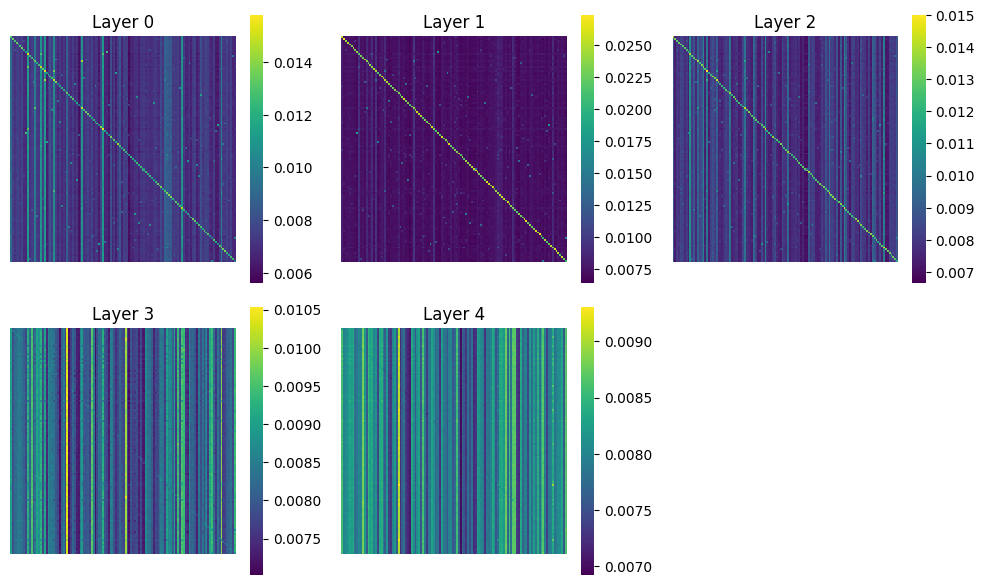

In [12]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.heatmap(x[i][1:,1:], cmap='viridis', annot=False, fmt='.3f', square=True, xticklabels=False, yticklabels=False)
    plt.title(f'Layer {i}')

plt.tight_layout()
plt.show()

Saving both to PDF

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# x: list/array of matrices, electrode_labels: list of labels

with PdfPages('attention_matrices.pdf') as pdf:
    for i in range(5):
        plt.figure(figsize=(25, 25))
        sns.heatmap(x[i], cmap='viridis', annot=False, fmt='.3f', square=True,
                    xticklabels=electrode_labels, yticklabels=electrode_labels)
        plt.title(f'Layer {i} with CLS')
        pdf.savefig()  # Save BEFORE plt.show()
        plt.close()

        plt.figure(figsize=(25, 25))
        sns.heatmap(x[i][1:,1:], cmap='viridis', annot=False, fmt='.3f', square=True,
                    xticklabels=electrode_labels[1:], yticklabels=electrode_labels[1:])
        plt.title(f'Layer {i} without CLS')
        pdf.savefig()  # Save BEFORE plt.show()
        plt.close()